# About the Dataset
The dataset we are using for this project is a publicly avaiable dataset on Kaggle. You can check out the original dataset by clicking on [this link](https://www.kaggle.com/imakash3011/customer-personality-analysis).

# Data Cleaning
In this notebook, we will clean up the dataset and create a new dataframe with the data we're going to use.

We're going to:
- Find any missing values and decide what to do with rows with missing values, if any
- Simplify categorical data by reducing the number of unique values
- Create new columns based on values from old columns (e.g. `Age` column using the `Year_Birth` column)
- Choose certain columns to keep to reduce number of dimensions

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import missingno.missingno as msno
from datetime import datetime
import seaborn as sns

In [2]:
df = pd.read_csv('marketing_campaign.csv')

df.head()

,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,...,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Z_CostContact,Z_Revenue,Response
0,5524,1957,Graduation,Single,58138.0,0,0,04-09-2012,58,635,...,7,0,0,0,0,0,0,3,11,1
1,2174,1954,Graduation,Single,46344.0,1,1,08-03-2014,38,11,...,5,0,0,0,0,0,0,3,11,0
2,4141,1965,Graduation,Together,71613.0,0,0,21-08-2013,26,426,...,4,0,0,0,0,0,0,3,11,0
3,6182,1984,Graduation,Together,26646.0,1,0,10-02-2014,26,11,...,6,0,0,0,0,0,0,3,11,0
4,5324,1981,PhD,Married,58293.0,1,0,19-01-2014,94,173,...,5,0,0,0,0,0,0,3,11,0


# Column Names
Below is a brief explanation of the column names:
<table border="0">
 <tr>
    <td><b style="font-size:15px">People</b></td>
    <td><b style="font-size:15px">Products</b></td>
    <td><b style="font-size:15px">Promotion</b></td>
    <td><b style="font-size:15px">Place</b></td>
 </tr>
 <tr>
     <td><b>ID</b>: Customer's unique identifier</td>
    <td><b>MntWines</b>: Amount spent on wine in last 2 years</td>
    <td><b>NumDealsPurchases</b>: Number of purchases made with a discount</td>
    <td><b>NumWebPurchases</b>: Number of purchases made through the company’s website</td>
 </tr>
 <tr>
    <td><b>Year_Birth</b>: Customer's birth year</td>
    <td><b>MntFruits</b>: Amount spent on fruits in last 2 years</td>
    <td><b>AcceptedCmp1</b>: 1 if customer accepted the offer in the 1st campaign, 0 otherwise</td>
    <td><b>NumCatalogPurchases</b>: Number of purchases made using a catalogue</td>
 </tr>
 <tr>
    <td><b>Education</b>: Customer's education level</td>
    <td><b>MntMeatProducts</b>: Amount spent on meat in last 2 years</td>
    <td><b>AcceptedCmp2</b>: 1 if customer accepted the offer in the 2nd campaign, 0 otherwise</td>
    <td><b>NumStorePurchases</b>: Number of purchases made directly in stores</td>
 </tr>
 <tr>
    <td><b>Marital_Status</b>: Customer's marital status</td>
    <td><b>MntFishProducts</b>: Amount spent on fish in last 2 years</td>
    <td><b>AcceptedCmp3</b>: 1 if customer accepted the offer in the 3rd campaign, 0 otherwise</td>
    <td><b>NumWebVisitsMonth</b>: Number of visits to company’s website in the last month</td>
 </tr>
 <tr>
    <td><b>Income</b>: Customer's yearly household income</td>
    <td><b>MntSweetProducts</b>: Amount spent on sweets in last 2 years</td>
    <td><b>AcceptedCmp4</b>: 1 if customer accepted the offer in the 4th campaign, 0 otherwise</td>
    <td></td>
 </tr>
 <tr>
    <td><b>Kidhome</b>: Number of children in customer's household</td>
    <td><b>MntGoldProds</b>: Amount spent on gold in last 2 years</td>
    <td><b>AcceptedCmp5</b>: 1 if customer accepted the offer in the 5th campaign, 0 otherwise</td>
    <td></td>
</tr>
 <tr>
    <td><b>Teenhome</b>: Number of teenagers in customer's household</td>
    <td></td>
    <td><b>Response</b>: 1 if customer accepted the offer in the last campaign, 0 otherwise</td>
    <td></td>
 </tr>
<tr>
    <td><b>Dt_Customer</b>: Date of customer's enrollment with the company</td>
    <td></td>
    <td></td>
    <td></td>
</tr>
<tr>
    <td><b>Recency</b>: Number of days since customer's last purchase</td>
    <td></td>
    <td></td>
    <td></td>
 </tr>
<tr>
    <td><b>Complain</b>: 1 if the customer complained in the last 2 years, 0 otherwise</td>
    <td></td>
    <td></td>
    <td></td>
</tr>
</table>

# Find Missing Values

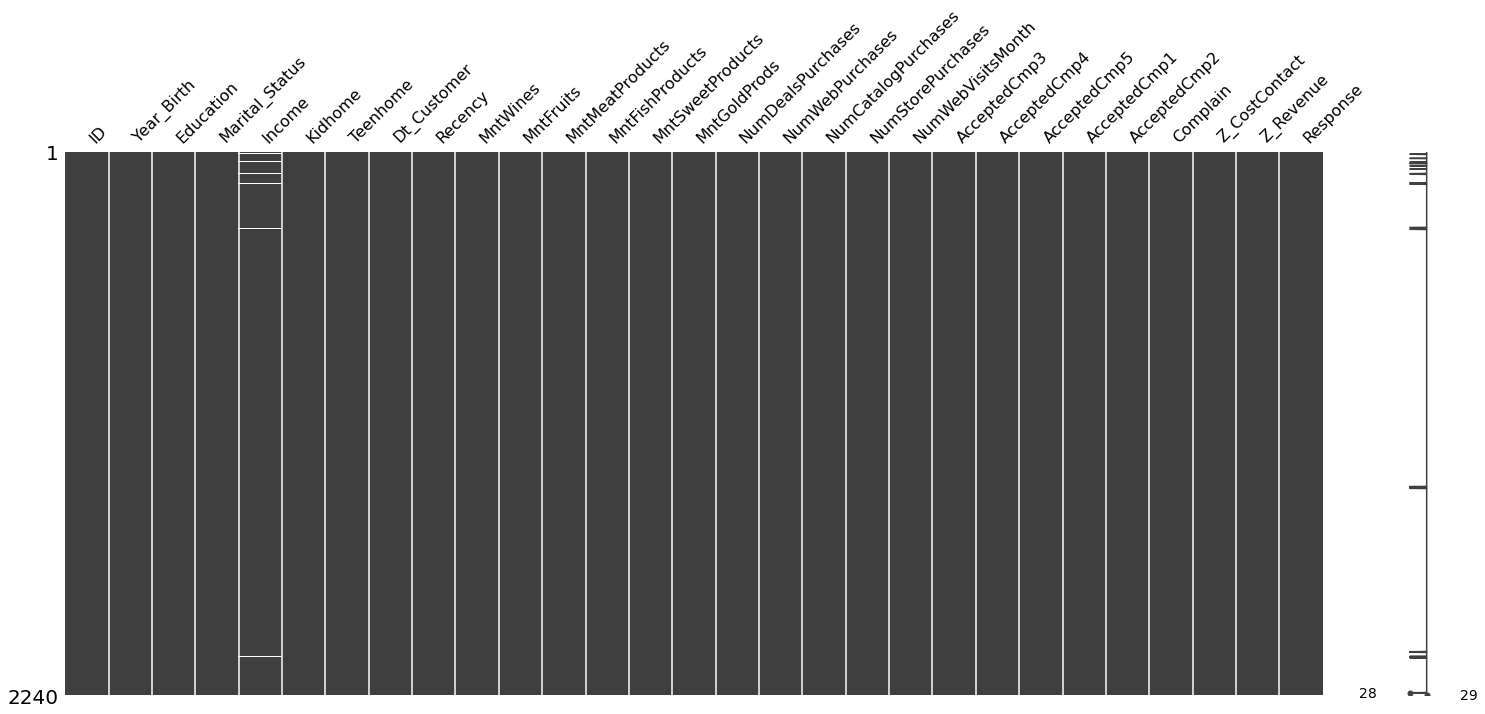

In [3]:
msno.matrix(df)
plt.show()

In [4]:
missing_rows = df.Income.isna().sum()
total_rows = df.shape[0]

print(f"""
There are {missing_rows} missing data points in the "Income" column.
Those rows make up {round((missing_rows/total_rows)*100, 2)}% of the total dataset.
""")


There are 24 missing data points in the "Income" column.
Those rows make up 1.07% of the total dataset.



In [5]:
# Take a look at some of the rows with missing income values
df[df.isna().any(axis=1)].head()

,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,...,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Z_CostContact,Z_Revenue,Response
10,1994,1983,Graduation,Married,NaN,1,0,15-11-2013,11,5,...,7,0,0,0,0,0,0,3,11,0
27,5255,1986,Graduation,Single,NaN,1,0,20-02-2013,19,5,...,1,0,0,0,0,0,0,3,11,0
43,7281,1959,PhD,Single,NaN,0,0,05-11-2013,80,81,...,2,0,0,0,0,0,0,3,11,0
48,7244,1951,Graduation,Single,NaN,2,1,01-01-2014,96,48,...,6,0,0,0,0,0,0,3,11,0
58,8557,1982,Graduation,Single,NaN,1,0,17-06-2013,57,11,...,6,0,0,0,0,0,0,3,11,0


Since the rows with missing values makes up a small percentage of the total dataset, we will remove these rows.

In [6]:
df.dropna(axis=0, inplace=True)

## Rename the Products Columns
We will rename the products columns to something simpler and easier to understand for our analysis.

In [7]:
df = df.rename(columns={
    'MntWines'        :'Wines',
    'MntFruits'       :'Fruits',
    'MntMeatProducts' :'Meat',
    'MntFishProducts' :'Fish',
    'MntSweetProducts':'Sweets',
    'MntGoldProds'    :'Gold'
})

# Create New Columns
We will create columns such as `CustomerAge` and `Seniority`. We will also reduce the number of categories for the `Education` and `Marital_Status` columns

## Customer Age
Calculate the customer's age by subtracting their birth year from the current year.

In [8]:
# Calculate the customer's age
df['CustomerAge'] = datetime.now().year - df.Year_Birth

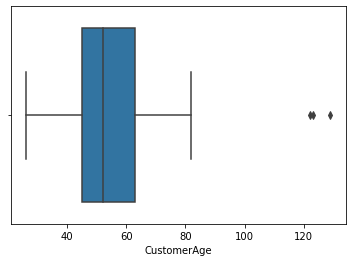

In [9]:
# Box plot of Age to spot any outliers
sns.boxplot(x="CustomerAge", data=df)
plt.show()

In [10]:
# Remove outliers
df = df[df['CustomerAge'] <= 90]

## Customer Seniority
Calculate the customer seniority by calculating the number of years since they joined.

In [11]:
# Convert string to datetime object
df['Dt_Customer'] = df['Dt_Customer'].apply(lambda x: datetime.strptime(x, '%d-%m-%Y').date())

In [12]:
# Calculate the number of days since customers joined
df['days_joined'] = datetime.now().date() - df.Dt_Customer
df['days_joined'] = df.days_joined.apply(lambda x: x.days)

# Convert number of days to approximate years
# Approximate because it does not take into account leap years
df['Seniority'] = round(df.days_joined / 365, 2)

# Remove the days_joined column
df.drop('days_joined', axis=1, inplace=True)

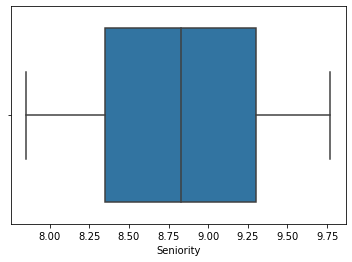

In [13]:
# Box plot of Seniority to spot any outliers
sns.boxplot(x="Seniority", data=df)
plt.show()

## Marital Status
We will simplify the `Marital_Status` column into "Relationship" and "Alone"

In [14]:
df.Marital_Status.value_counts()

Married     857
Together    572
Single      470
Divorced    231
Widow        76
Alone         3
Absurd        2
YOLO          2
Name: Marital_Status, dtype: int64

We will drop the "YOLO" and "Absurd" marital status because we are not sure if that means they are single or in a relationship. We do not want to make assumptions that may be incorrect.

In [15]:
df = df[(df.Marital_Status != 'YOLO') & (df.Marital_Status != 'Absurd')]

In [16]:
# Simplify the Marital_Status column
def married_single(x):
    relationship = {
        'Married' :'Relationship',
        'Together':'Relationship',
        'Single'  :'Alone',
        'Divorced':'Alone',
        'Widow'   :'Alone',
        'Alone'   :'Alone'
    }
    
    return relationship[x]

df['Relationship_Status'] = df.Marital_Status.apply(married_single)

In [17]:
df.Relationship_Status.value_counts()

Relationship    1429
Alone            780
Name: Relationship_Status, dtype: int64

## Education
We will simplify the `Education` column into "Undergraduate" and "Postgraduate"

In [18]:
df.Education.value_counts()

Graduation    1115
PhD            478
Master         364
2n Cycle       198
Basic           54
Name: Education, dtype: int64

In [19]:
def edu(x):
    education = {
        'Basic'     :'Undergraduate',
        '2n Cycle'  :'Undergraduate',
        'Graduation':'Postgraduate',
        'Master'    :'Postgraduate',
        'PhD'       :'Postgraduate'
    }
    return education[x]

df['Simplified_Education'] = df.Education.apply(edu)

In [20]:
df.Simplified_Education.value_counts()

Postgraduate     1957
Undergraduate     252
Name: Simplified_Education, dtype: int64

## Children

In [21]:
# Calculate the total number of children
df['TotalChildren'] = df.Kidhome + df.Teenhome

# Boolean if the customer has a child
df['HasChild'] = df['TotalChildren'].apply(lambda x: 0 if x == 0 else 1)

In [22]:
df.HasChild.value_counts()

1    1579
0     630
Name: HasChild, dtype: int64

# Remove Columns
Since `Z_CostContact` and `Z_Revenue` don't have any explanation, we will remove them

In [23]:
df.drop(['Z_CostContact', 'Z_Revenue'], axis=1, inplace=True)

In [24]:
df.head()

,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,Wines,...,AcceptedCmp1,AcceptedCmp2,Complain,Response,CustomerAge,Seniority,Relationship_Status,Simplified_Education,TotalChildren,HasChild
0,5524,1957,Graduation,Single,58138.0,0,0,2012-09-04,58,635,...,0,0,0,1,65,9.67,Alone,Postgraduate,0,0
1,2174,1954,Graduation,Single,46344.0,1,1,2014-03-08,38,11,...,0,0,0,0,68,8.16,Alone,Postgraduate,2,1
2,4141,1965,Graduation,Together,71613.0,0,0,2013-08-21,26,426,...,0,0,0,0,57,8.71,Relationship,Postgraduate,0,0
3,6182,1984,Graduation,Together,26646.0,1,0,2014-02-10,26,11,...,0,0,0,0,38,8.23,Relationship,Postgraduate,1,1
4,5324,1981,PhD,Married,58293.0,1,0,2014-01-19,94,173,...,0,0,0,0,41,8.29,Relationship,Postgraduate,1,1


# Outliers

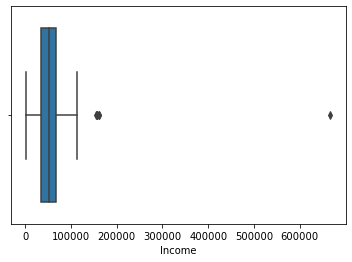

In [25]:
# Box plot of Income to spot any outliers
sns.boxplot(x="Income", data=df)
plt.show()

Let's check out the high income earners to see if there is any useful information

In [26]:
df[df['Income'] >= 120000]

,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,Wines,...,AcceptedCmp1,AcceptedCmp2,Complain,Response,CustomerAge,Seniority,Relationship_Status,Simplified_Education,TotalChildren,HasChild
164,8475,1973,PhD,Married,157243.0,0,1,2014-03-01,98,20,...,0,0,0,0,49,8.18,Relationship,Postgraduate,1,1
617,1503,1976,PhD,Together,162397.0,1,1,2013-06-03,31,85,...,0,0,0,0,46,8.92,Relationship,Postgraduate,2,1
655,5555,1975,Graduation,Divorced,153924.0,0,0,2014-02-07,81,1,...,0,0,0,0,47,8.24,Alone,Postgraduate,0,0
687,1501,1982,PhD,Married,160803.0,0,0,2012-08-04,21,55,...,0,0,0,0,40,9.75,Relationship,Postgraduate,0,0
1300,5336,1971,Master,Together,157733.0,1,0,2013-06-04,37,39,...,0,0,0,0,51,8.92,Relationship,Postgraduate,1,1
1653,4931,1977,Graduation,Together,157146.0,0,0,2013-04-29,13,1,...,0,0,0,0,45,9.02,Relationship,Postgraduate,0,0
2132,11181,1949,PhD,Married,156924.0,0,0,2013-08-29,85,2,...,0,0,0,0,73,8.68,Relationship,Postgraduate,0,0
2233,9432,1977,Graduation,Together,666666.0,1,0,2013-06-02,23,9,...,0,0,0,0,45,8.93,Relationship,Postgraduate,1,1


Most of the rows seem reasonable, but the **Row 2233** with an income of $666,666.00 seems like it's a mistake. We will remove that row for our analysis.

In [27]:
df = df[df['Income'] <= 200000]
df['Income'] = df.Income.astype(int)  # Convert to integer datatype

# Duplicates
We will do a final check to see if there are any duplicated rows

In [28]:
df.shape

(2208, 33)

In [29]:
# Get all the columns *except* ID
remove_id = df.drop('ID', axis=1).columns

# Check for duplicates
n_duplicates = df.duplicated(subset=remove_id).sum()
print(f'There are {n_duplicates} duplicates in the dataset.')

There are 182 duplicates in the dataset.


In [30]:
# Remove the duplicates
df.drop_duplicates(subset=remove_id, inplace=True)

In [31]:
df.shape

(2026, 33)

# Save the New DataFrame
We will save this final DataFrame for further analysis.

In [32]:
df.to_csv('./saved-items/altered_dataset.csv', index=False)

<table border="0">
 <tr>
    <td><b style="font-size:15px">People</b></td>
    <td><b style="font-size:15px">Products</b></td>
    <td><b style="font-size:15px">Promotion</b></td>
    <td><b style="font-size:15px">Place</b></td>
 </tr>
 <tr>
     <td><b>ID</b>: Customer's unique identifier</td>
    <td>MntWines: Amount spent on wine in last 2 years</td>
    <td>NumDealsPurchases: Number of purchases made with a discount</td>
    <td>NumWebPurchases: Number of purchases made through the company’s website</td>
 </tr>
 <tr>
    <td>Year_Birth: Customer's birth year</td>
    <td>MntFruits: Amount spent on fruits in last 2 years</td>
    <td>AcceptedCmp1: 1 if customer accepted the offer in the 1st campaign, 0 otherwise</td>
    <td>NumCatalogPurchases: Number of purchases made using a catalogue</td>
 </tr>
 <tr>
    <td>Education: Customer's education level</td>
    <td>MntMeatProducts: Amount spent on meat in last 2 years</td>
    <td>AcceptedCmp2: 1 if customer accepted the offer in the 2nd campaign, 0 otherwise</td>
    <td>NumStorePurchases: Number of purchases made directly in stores</td>
 </tr>
 <tr>
    <td>Marital_Status: Customer's marital status</td>
    <td>MntFishProducts: Amount spent on fish in last 2 years</td>
    <td>AcceptedCmp3: 1 if customer accepted the offer in the 3rd campaign, 0 otherwise</td>
    <td>NumWebVisitsMonth: Number of visits to company’s website in the last month</td>
 </tr>
 <tr>
    <td>Income: Customer's yearly household income</td>
    <td>MntSweetProducts: Amount spent on sweets in last 2 years</td>
    <td>AcceptedCmp4: 1 if customer accepted the offer in the 4th campaign, 0 otherwise</td>
    <td></td>
 </tr>
 <tr>
    <td>Kidhome: Number of children in customer's household</td>
    <td>MntGoldProds: Amount spent on gold in last 2 years</td>
    <td>AcceptedCmp5: 1 if customer accepted the offer in the 5th campaign, 0 otherwise</td>
    <td></td>
</tr>
 <tr>
    <td>Teenhome: Number of teenagers in customer's household</td>
    <td></td>
    <td>Response: 1 if customer accepted the offer in the last campaign, 0 otherwise</td>
    <td></td>
 </tr>
<tr>
    <td>Dt_Customer: Date of customer's enrollment with the company</td>
    <td></td>
    <td></td>
    <td></td>
</tr>
<tr>
    <td>Recency: Number of days since customer's last purchase</td>
    <td></td>
    <td></td>
    <td></td>
 </tr>
<tr>
    <td>Complain: 1 if the customer complained in the last 2 years, 0 otherwise</td>
    <td></td>
    <td></td>
    <td></td>
</tr>
</table>
